In [1]:
'''Recurrent neural network (RNN) Use the Google stock prices dataset and design a time series
analysis and prediction system using RNN.'''

'Recurrent neural network (RNN) Use the Google stock prices dataset and design a time series\nanalysis and prediction system using RNN.'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [33]:
data_train= pd.read_csv('Google_Stock_Train.csv')

In [34]:
data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [35]:
train= data_train.iloc[:, 1: 2].values

In [36]:
train.shape

(3272, 1)

In [37]:
sc= MinMaxScaler(feature_range= (0,1))
scaled= sc.fit_transform(train)

In [38]:
x_train=[]
y_train=[]
for i in range(60, len(scaled)):
    x_train.append(scaled[i-60: i, 0])
    y_train.append(scaled[i,0])

x_train, y_train= np.array(x_train), np.array(y_train)

In [39]:
x_train.shape

(3212, 60)

In [40]:
y_train.shape

(3212,)

In [41]:
x_train= np.reshape(x_train, newshape= (x_train.shape[0], x_train.shape[1], 1))

In [42]:
x_train.shape

(3212, 60, 1)

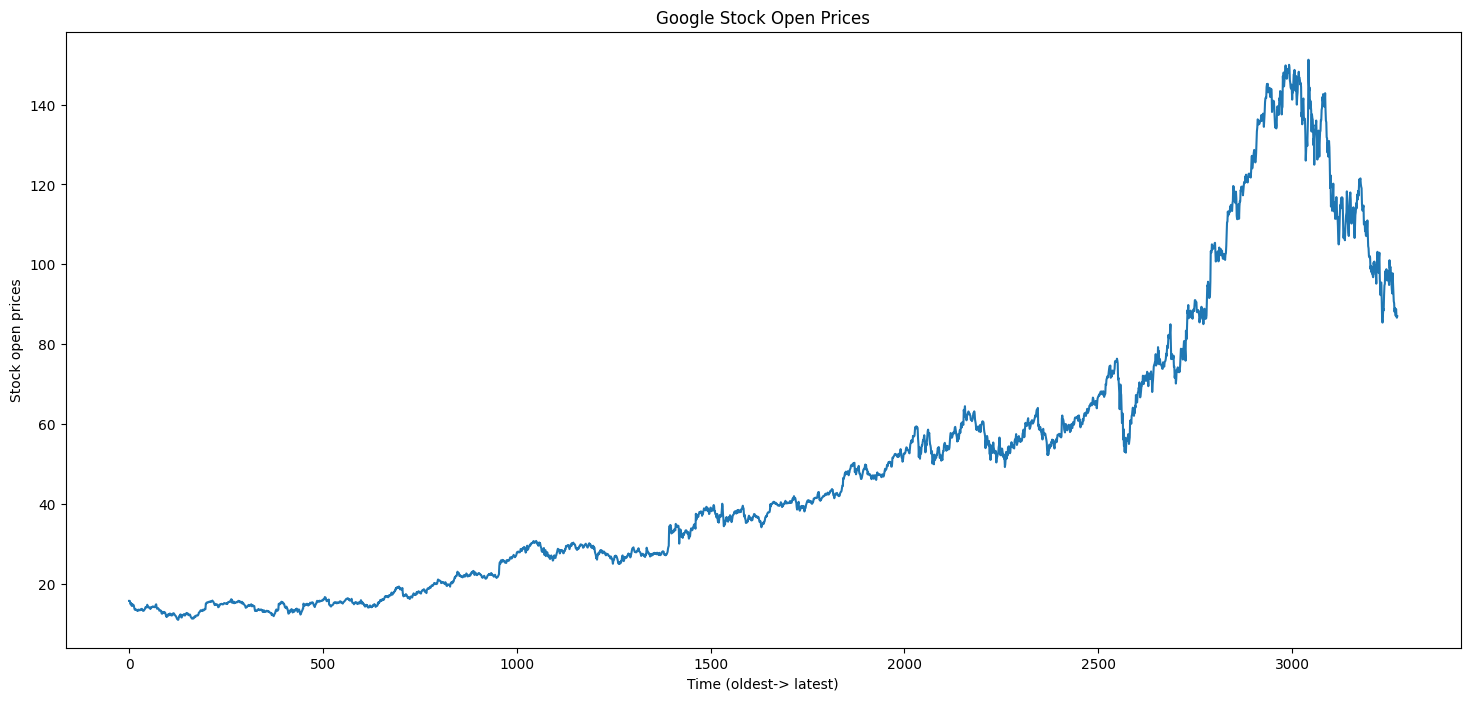

In [43]:
plt.figure(figsize=(18,8))
plt.plot(data_train['Open'])
plt.title('Google Stock Open Prices')
plt.xlabel('Time (oldest-> latest)')
plt.ylabel('Stock open prices')
plt.show()

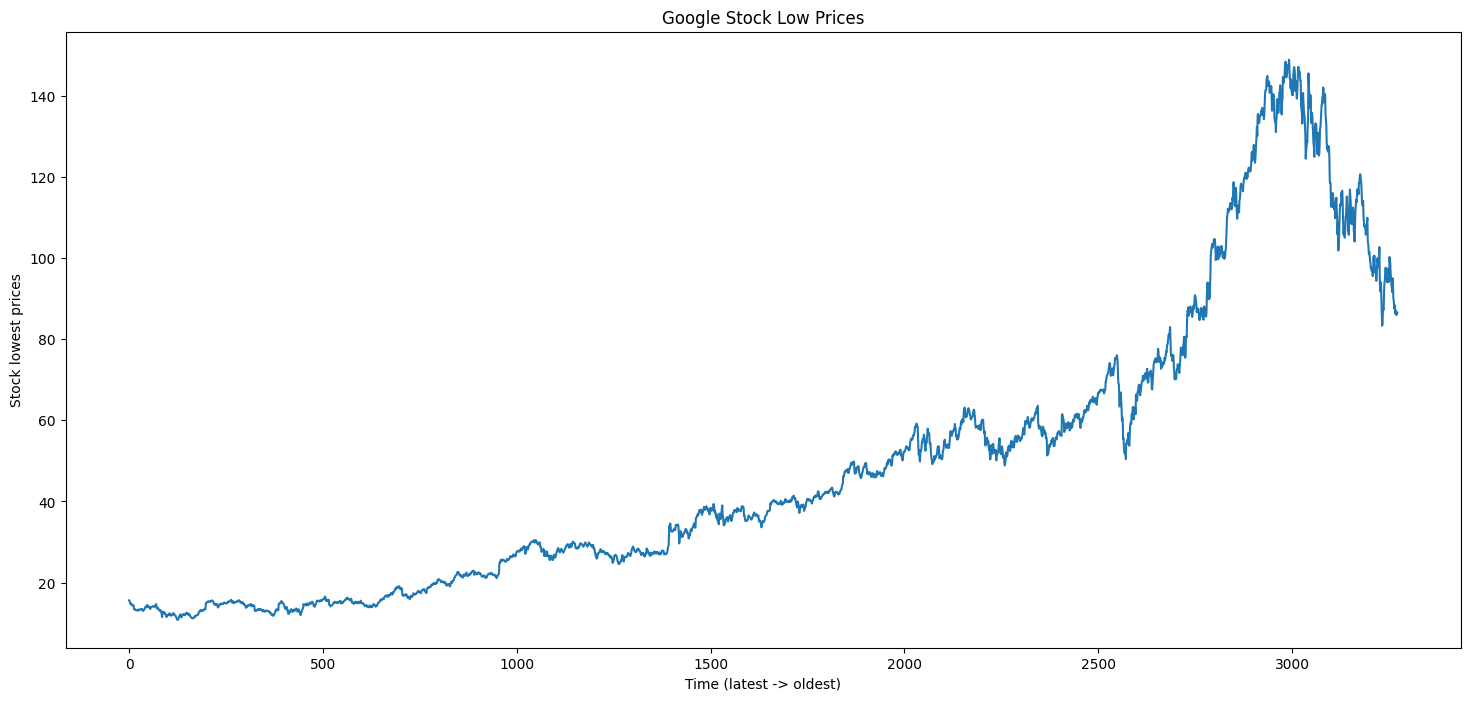

In [44]:
plt.figure(figsize=(18,8))
plt.plot(data_train['Low'])
plt.title('Google Stock Low Prices')
plt.xlabel('Time (latest -> oldest)')
plt.ylabel('Stock lowest prices')
plt.show()

In [45]:
regressor= Sequential()
#add 1st lstm layer
regressor.add(LSTM(units= 50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
regressor.add(Dropout(rate= 0.2))

#add 2nd lstm layer
regressor.add(LSTM(units= 50, return_sequences=True))
regressor.add(Dropout(rate= 0.2))

#add 3rd lstm layer
regressor.add(LSTM(units= 50, return_sequences=True))
regressor.add(Dropout(rate= 0.2))

#add 4th lstm layer
regressor.add(LSTM(units= 50, return_sequences=True))
regressor.add(Dropout(rate= 0.2))

#add output layer
regressor.add(Dense(units= 1))

C:\Users\Ecourt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [47]:
regressor.fit(x=x_train, y=y_train, batch_size=32, epochs=10)

Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 36s 191ms/step - loss: 0.0854
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - loss: 0.0691
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - loss: 0.0653
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - loss: 0.0654
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - loss: 0.0682
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - loss: 0.0636
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - loss: 0.0634
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 202ms/step - loss: 0.0666
Epoch 9/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - loss: 0.0644
Epoch 10/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - loss: 0.0677


In [48]:
data_test= pd.read_csv('Google_Stock_Test.csv')

In [49]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


In [50]:
real_stock_price= data_train.iloc[:, 1: 2].values
real_stock_price.shape

(3272, 1)

In [52]:
#vertical concat use 0, horizontal uses 1
dataset_total= pd.concat((data_train['Open'], data_test['Open']), axis= 0)

#use .values to make numpy array
inputs= dataset_total[len(dataset_total) - len(data_test) - 60:].values

inputs= inputs.reshape(-1, 1)

#scale input
inputs= sc.transform(inputs)

In [53]:
len(inputs)

203

In [55]:
x_test=[]
for i in range(60, len(inputs)):
    x_test.append(inputs[i-60: i, 0])
x_test= np.array(x_test)

#add dimension of indicator
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [56]:
x_test.shape

(143, 60, 1)

In [57]:
predicted_stock_price= regressor.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 658ms/step


In [61]:
predicted_stock_price_2d = predicted_stock_price.reshape(-1, predicted_stock_price.shape[-1])
predicted_stock_price_og = sc.inverse_transform(predicted_stock_price_2d)

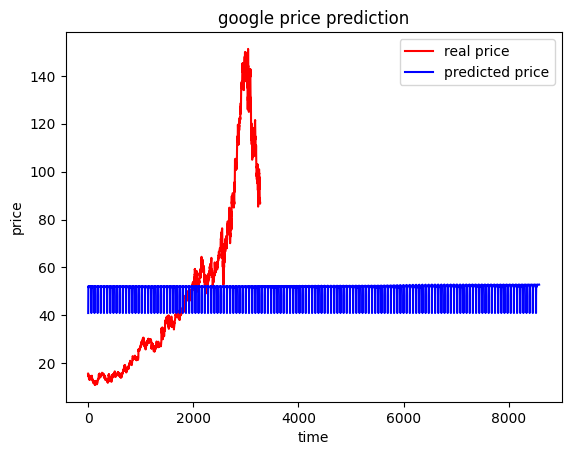

In [62]:
plt.plot(real_stock_price, color= 'red', label= 'real price')
plt.plot(predicted_stock_price_og, color= 'blue', label= 'predicted price')

plt.title('google price prediction')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()